<a href="https://colab.research.google.com/github/Navbaloo/Yes_Bank_Stock_Closing_Price_Predection/blob/main/Yes_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title :- Yes Bank Stock Closing Price Prediction**
- **By** **:-** **Navjot Balouria**
- **Individually Done**

 # **Problem Statement**
 Yes Bank is awell known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana kapoor. Owing to this fact it was interesting to see how that impacted the stock prices of the company and whether Time Series models or any other predictive models can do justice to such solutions. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest and lowest stock prices of every month.


**Objective:** Predict the stock's closing price of the month.

# **GitHub Link**   https://github.com/Navbaloo/Yes_Bank_Stock_Closing_Price_Predection

# **Loading The Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# **Importing The Dataset**

In [ ]:
# loading dataset
data_frame = pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')


# **Dataset First Look**

In [ ]:
# first look of the dataset
data_frame

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [ ]:
# First 5 rows of the dataset
data_frame.head(5)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# last 5 rows of the dataset
data_frame.tail(5)

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
# shape of the dataset
data_frame.shape

(185, 5)

- The dataset consist of 185 Rows and 5 Columns

# **Information of the dataset**

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


# **Duplicated Values**

In [ ]:
# checking for duplicate values
data_frame.duplicated().sum()

0

- The dataset doesn't contain duplicated values

# **Missing Values**

In [ ]:
# checking for Missing / Null values
data_frame.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

- There are no NaN values

# **Understanding The Variables**

In [ ]:
# dataset columns 
list(data_frame.columns)


['Date', 'Open', 'High', 'Low', 'Close']

In [ ]:
# description of the dataset
data_frame.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


**- Variable description**

**1. Date :**  The date on which the record was made.

**2. Open :**  The price of stock at the time of opening.

**3. High :**  The highest price of the stock in the day.

**4. Low :**  The lowest price of the stock in the dsy.

**5. Close :**  The final stock price.



# **Data Visualisation**

- Univariate Analysis

In [ ]:
# Boxplot for 'open' column
fig= px.box(data_frame['Open'])
fig.update_layout(xaxis= dict(title='Boxplot'),width=700,height=500)
fig.show()

-  The purpose of univariate analysis is to understand the distribution of values for a single variable.
- There are outliers present in 'open' column
- I have used the box plot method here because, box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.
- This is Positive skewed.

In [ ]:
# applying log10 Transformation
fig= px.box(np.log10(data_frame['Open']), title='Applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'),width=700,height=500)
fig.show()

- Applied log10 transformation
- Outlires have been removed
- Hence Normal disturbation

In [ ]:
# Boxplot for 'High' column
fig= px.box(data_frame['High'])
fig.update_layout(xaxis= dict(title='Boxplot'),width=700,height=500)
fig.show()

- Positive Skewed

In [ ]:
# applying log10 Transformation
fig= px.box(np.log10(data_frame['High']), title='Applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'),width=700,height=500)
fig.show()

- Normal Distribution

In [ ]:
# Boxplot for 'Low' column
fig= px.box(data_frame['Low'])
fig.update_layout(xaxis= dict(title='Boxplot'),width=700,height=500)
fig.show()

- Positive skewed

In [ ]:
# applying log10 Transformation
fig= px.box(np.log10(data_frame['Low']), title='Applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'),width=700,height=500)
fig.show()

In [ ]:
# Boxplot for 'Close' column
fig= px.box(data_frame['Close'])
fig.update_layout(xaxis= dict(title='Boxplot'),width=700,height=500)
fig.show()

- Poitive Skewed

In [ ]:
# applying log10 Transformation
fig= px.box(np.log10(data_frame['Close']), title='Applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'),width=700,height=500)
fig.show()

- Bivariate Analysis

In [ ]:
# Relationship between Month and Closing Price
ax= px.line(data_frame, data_frame['Date'], data_frame['Close'], title='Monthly Closing Price')
ax.update_layout(xaxis=dict(title='Month and Year'), yaxis=dict(title='Closing Price'),width=700,height=500)

- The closing prediction of the month July and year 2018 is maximum.
- The closing prediction of the month March and year 2009 is minimum.

In [ ]:
# Relationship between Open and Close Price
fig= px.scatter(data_frame, x='Open', y='Close', title= 'Relation between Open and Close Price')
fig.update_layout(autosize= False, width=700, height=500)
fig.show()

- There is a positive correlation between Open and Closing Price.

In [ ]:
# Relationship between the Low and Close price
fig=px.scatter(data_frame, x='Low', y='Close',title='Relationship between Low and Close price')
fig.update_layout(autosize=False,width=700,height=500)
fig.show()

- Positive correlation between Low and close price

In [ ]:
# Relationship between High and close Price
fig=px.scatter(data_frame, x='High', y='Close',title='Relationship between High and Close price')
fig.update_layout(autosize=False,width=700,height=500)
fig.show()


- Positive correlation between high and close Price

**- Multicollinearity**

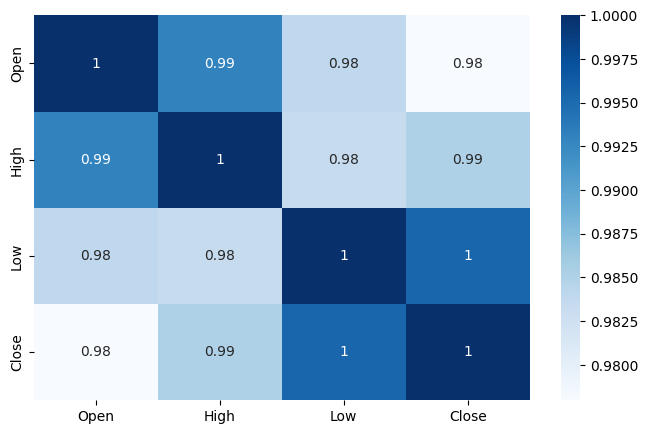

In [ ]:
# Heatmap of the dataset
plt.figure(figsize=(8,5))
cor= sns.heatmap(data_frame.corr(), annot=True,cmap="Blues")

 - There is high correlation between all the variables and shows positive correlation.

# **Data Pre-Processing**

- Dropping date column from the dataset.


In [ ]:
data_frame.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# Droping Date column
new_data_frame= data_frame.drop(['Date'], axis=1)
new_data_frame.head(5)

,Open,High,Low,Close
0,13.00,14.00,11.25,12.46
1,12.58,14.88,12.55,13.42
2,13.48,14.87,12.27,13.30
3,13.20,14.47,12.40,12.99
4,13.35,13.88,12.88,13.41


In [ ]:
# Setting  dependent variable as Close
dependent_variable= 'Close'


# Setting independent variable 
independent_variable= list(set(new_data_frame.columns.tolist())-{dependent_variable})


In [ ]:
# Assigning x to independent variable
x=(new_data_frame[independent_variable]).values

In [ ]:
# Assigning y to dependent variable
y=(new_data_frame[dependent_variable]).values

In [ ]:
# Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
# training set for independent variable
x_train

array([[155.  , 142.08, 134.  ],
       [ 20.95,  16.2 ,  16.02],
       [100.4 ,  92.4 ,  57.71],
       [ 72.55,  59.5 ,  40.95],
       [ 17.51,  10.04,   9.94],
       [ 78.94,  49.2 ,  44.8 ],
       [ 52.06,  47.8 ,  47.3 ],
       [ 41.04,  35.98,  35.02],
       [ 55.56,  49.99,  30.24],
       [ 28.3 ,  25.6 ,  11.1 ],
       [100.15,  94.  ,  83.42],
       [ 15.34,  14.3 ,  12.75],
       [ 40.7 ,  39.1 ,  33.6 ],
       [ 32.6 ,  30.2 ,  26.8 ],
       [330.58, 309.6 , 300.2 ],
       [ 77.88,  69.  ,  66.2 ],
       [366.  , 314.  , 307.35],
       [ 28.47,  22.8 ,  21.4 ],
       [ 52.34,  41.2 ,  36.8 ],
       [ 60.08,  56.  ,  51.2 ],
       [366.5 , 355.  , 304.65],
       [ 17.8 ,  14.79,  11.25],
       [117.6 ,  88.8 ,  86.98],
       [ 36.14,  30.66,  29.11],
       [118.69, 107.4 , 103.31],
       [ 92.4 ,  89.2 ,  53.15],
       [364.4 , 362.85, 325.7 ],
       [ 70.6 ,  65.45,  62.14],
       [109.43, 100.99,  97.2 ],
       [155.5 , 135.61, 127.  ],
       [ 4

In [ ]:
# Printing 10 first rows
x_train[0:10]

array([[155.  , 142.08, 134.  ],
       [ 20.95,  16.2 ,  16.02],
       [100.4 ,  92.4 ,  57.71],
       [ 72.55,  59.5 ,  40.95],
       [ 17.51,  10.04,   9.94],
       [ 78.94,  49.2 ,  44.8 ],
       [ 52.06,  47.8 ,  47.3 ],
       [ 41.04,  35.98,  35.02],
       [ 55.56,  49.99,  30.24],
       [ 28.3 ,  25.6 ,  11.1 ]])

In [ ]:
# Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# First ten rows after transforming
x_train[0:10]

array([[0.37416306, 0.37409338, 0.37784968],
       [0.02218721, 0.0174524 , 0.03079865],
       [0.23079953, 0.23334089, 0.15343433],
       [0.15767362, 0.14012919, 0.10413296],
       [0.01315479, 0.        , 0.01291366],
       [0.17445188, 0.11094742, 0.11545816],
       [0.10387292, 0.10698096, 0.12281218],
       [0.07493764, 0.07349275, 0.08668922],
       [0.11306289, 0.11318563, 0.07262833],
       [0.04148615, 0.04408432, 0.01632593]])

# **Linear Regresion**

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
# intercept of the model
regressor.intercept_

8.457918910825072

In [ ]:
# coefficients of the model
regressor.coef_

array([ 176.73898094, -155.44880876,  344.80781882])

In [ ]:
# Predictes values for y_train
regressor.predict(x_train)

array([146.72027095,  20.28592336,  65.8819852 ,  50.44793759,
        15.23561451,  61.85459823,  52.53284857,  40.16908149,
        35.88878199,  14.56659276,  91.13869624,  15.20258174,
        37.19691384,  30.46051212, 322.99740094,  74.34827852,
       344.748914  ,  26.32583016,  44.9194814 ,  56.59897505,
       324.18535689,  14.60694255, 105.13765118,  34.24371924,
       114.01511869,  58.95363472, 341.10436552,  68.4153446 ,
       106.34362922, 142.70175837,  39.07061985,  95.5183451 ,
       108.5221471 , 135.40964254,  16.14727243,  95.56998849,
        70.48676464,  14.85875244,  57.62715879,  79.85364268,
       181.75839869,  11.92318773,  18.87174117, 104.58962448,
        54.66082337,  29.43057942, 107.82444302, 168.75484434,
       126.78760947,  47.6880133 , 375.15383567,  26.34916657,
        38.18668733, 152.84772757,  94.01466327,  64.49183669,
       198.71878378,  14.96237912,  67.18542936,  33.10529786,
        28.94244475,  70.20472972,  19.00292338, 294.02

In [ ]:
# Actual value of y_train
y_train

array([154.57,  20.08,  64.76,  41.45,  15.45,  57.5 ,  50.97,  37.93,
        50.54,  11.95,  85.71,  13.15,  34.55,  28.63, 326.14,  73.46,
       354.45,  25.32,  47.31,  54.5 , 322.25,  12.26, 113.89,  33.51,
       114.33,  59.5 , 346.2 ,  67.83,  97.49, 145.92,  43.48,  92.84,
       108.38, 149.38,  14.37, 100.28,  70.3 ,  13.3 ,  53.83,  74.02,
       188.73,  10.26,  18.03, 104.41,  55.61,  26.85, 108.7 , 176.52,
       136.83,  48.65, 350.  ,  27.95,  40.99, 151.82,  92.2 ,  61.21,
       206.39,  15.03,  61.02,  33.45,  31.93,  65.97,  17.84, 290.56,
        35.98,  14.67, 137.9 ,  28.14,  22.78,  65.99,  82.7 ,  50.57,
        73.74,  54.49,  12.99,  12.42, 181.75,  15.33,  61.98,  62.9 ,
        72.85, 234.28,  16.16, 292.37, 183.45,  18.46,  12.46,  94.5 ,
       188.05,  25.12,  15.62, 168.6 ,  61.59,  22.85,  57.1 ,  62.54,
        13.42, 165.74, 315.05,  12.24,  88.14, 243.44, 169.65,  26.97,
        24.13, 272.56,  53.41, 351.15, 172.91,  31.13,  46.18, 172.5 ,
      

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [ ]:
# Predicted closing price on the test data
y_pred

array([ 32.05041945, 141.39404628,  44.6186774 , 142.1847688 ,
        67.10693606,  32.62047222, 232.84048635,  18.11837716,
        15.39523209, 214.31677099, 300.57479208,  87.42383581,
       154.01722588,  59.84864685, 342.68198056, 260.7391185 ,
        74.67777157,  28.85960368, 260.75411505,  51.64750396,
        10.53811057, 118.55620032, 147.10778122,  59.92309426,
       218.04859715,  47.9878126 , 250.16672269,  15.07529924,
       108.6874867 ,  53.2946785 , 368.83014088, 339.95761347,
        73.72840345, 167.96544878,  40.15717944,  48.9966109 ,
       262.36562296])

In [ ]:
# Actual closing price on test data
y_test

array([ 34.06, 145.23,  46.95, 142.08,  62.22,  30.16, 231.26,  16.12,
        13.71, 194.3 , 304.9 ,  91.3 , 153.3 ,  62.38, 339.6 , 275.05,
        71.86,  26.83, 279.1 ,  49.84,   9.98, 111.7 , 147.95,  58.99,
       221.3 ,  70.45, 250.85,  13.41, 108.21,  52.59, 343.4 , 361.96,
        76.44, 163.31,  41.36,  47.32, 253.52])

In [ ]:
# Calculating the mean squared error for linear regression
mse= mean_squared_error(y_test, y_pred)
print(mse)

77.87298624685252


In [ ]:
# Calculating the root mean squared error for linear regression
rmse= math.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

8.824567198840548


In [ ]:
# Calculating the mean absolute error for linear regression
mae= mean_absolute_error(y_test, y_pred)
print(mae)

5.397623269661975


In [ ]:
# Calculating r2_score for linear regression
r2_score= r2_score(y_test, y_pred)
print(r2_score)

0.9930815866308079


- Mean squared error - 77.87298624685252
- Root mean squared error - 8.824567198840548
- Mean absoulte error - 5.397623269661975
- r2_score - 0.9930815866308079

In [ ]:
# scatter plot for comparing actual and predicted value
fig= px.scatter(x=y_test, y=y_pred, labels={'x':'Actual_Value', 'y': 'Prediction'})
fig.add_shape(type="line", line=dict(dash='dash'), x0=y.min(), y0=y.min(),x1=y.max(),y1=y.max())
fig.update_layout(autosize=False,width=700,height=500)
fig.show()

# **Regularization**




* Ridge Regression with Cross Validation 





In [ ]:
# Performing Ridge Regression
ridge= Ridge()
param= {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5]}
ridge_regressor= GridSearchCV(ridge, param, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

In [ ]:
#Evaluating with best parameter
ridge_regressor.best_params_

{'alpha': 0.01}

In [ ]:
# Predicted value of y test in ridge regression
y_pred_ridge= ridge_regressor.predict(x_test)
print(y_pred_ridge)

[ 32.24518326 142.01815115  45.52369265 142.17943424  66.84122133
  32.46430002 233.07854276  18.18509721  15.49469451 212.17590568
 301.5338668   88.28254143 154.1237241   60.01017589 343.38742121
 259.02606478  74.67204777  28.8256242  258.78661329  51.80449407
  10.65925417 118.37409571 147.43844763  59.7518871  217.64917055
  46.93020769 250.76539347  15.19285268 108.79480878  53.77733559
 368.42312915 336.73757933  73.41164657 168.31070944  40.15693519
  49.14480034 262.24622602]


In [ ]:
# Actual value
y_test

array([ 34.06, 145.23,  46.95, 142.08,  62.22,  30.16, 231.26,  16.12,
        13.71, 194.3 , 304.9 ,  91.3 , 153.3 ,  62.38, 339.6 , 275.05,
        71.86,  26.83, 279.1 ,  49.84,   9.98, 111.7 , 147.95,  58.99,
       221.3 ,  70.45, 250.85,  13.41, 108.21,  52.59, 343.4 , 361.96,
        76.44, 163.31,  41.36,  47.32, 253.52])

In [ ]:
#Calculating mean squared error for ridge model
mse_ridge= mean_squared_error(y_test, y_pred_ridge)
print(mse_ridge)

83.6100619624804


In [ ]:
#Calculating mean absolute error for ridge model
mae_ridge= mean_absolute_error(y_test, y_pred_ridge)
print(mae_ridge)

5.485457740724157


In [ ]:
#Calculating root mean squared error for ridge model
rmse_ridge=  math.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(rmse_ridge)

9.143853780681338


In [ ]:
#Calculating r2_score_ridge
r2_score_ridge= r2_score(y_test, y_pred_ridge)
print(r2_score_ridge)

0.992571891764282


- Mean squared error - 83.6100619624804
- Root mean squared error - 9.143853780681338
- Mean absoulte error - 5.485457740724157
- r2_score - 0.992571891764282

In [ ]:
#Plotting a scatter plot for comparing actual and predicted value
fig= px.scatter(x=y_test, y=y_pred_ridge, labels={'x':'Actual_Value', 'y': 'Prediction'})
fig.add_shape(type="line", line=dict(dash='dash'), x0=y.min(), y0=y.min(),x1=y.max(),y1=y.max())
fig.update_layout(autosize=False,width=700,height=500)
fig.show()

# **Lasso Regression**

In [ ]:
# Performing Lasso Regression
lasso= Lasso()
param= {'alpha':[1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,2.58,2.6,2.7,2.8,3.2,3.33,3.4,3.56,3.6,3.7,3.8,4,4.2,4.5]}
lasso_regressor= GridSearchCV(lasso,param,scoring='neg_mean_squared_error',cv=3)
lasso_regressor.fit(x_train,y_train)


In [ ]:
# Predicted Value of y_test
y_pred_lasso= lasso_regressor.predict(x_test)
print(y_pred_lasso)

[ 32.07252728 141.46687803  44.68408275 142.20736432  67.08750222
  32.60755303 232.88814721  18.13218558  15.41186479 214.08096143
 300.69196532  87.49617391 154.05051019  59.87227708 342.80864117
 260.56122142  74.68922829  28.86197559 260.54294485  51.66513971
  10.55348367 118.54393424 147.11884593  59.9141612  218.03529181
  47.83164885 250.2103646   15.09428805 108.70984503  53.34135785
 368.79099132 339.6070875   73.70075375 168.01048174  40.16275985
  49.01866615 262.39416048]


In [ ]:
# Actual Value of y_test
y_test

array([ 34.06, 145.23,  46.95, 142.08,  62.22,  30.16, 231.26,  16.12,
        13.71, 194.3 , 304.9 ,  91.3 , 153.3 ,  62.38, 339.6 , 275.05,
        71.86,  26.83, 279.1 ,  49.84,   9.98, 111.7 , 147.95,  58.99,
       221.3 ,  70.45, 250.85,  13.41, 108.21,  52.59, 343.4 , 361.96,
        76.44, 163.31,  41.36,  47.32, 253.52])

In [ ]:
# Calculating mean squared error for lasso model
mse_lasso= mean_squared_error(y_test, y_pred_lasso)
print(mse_lasso)

78.51214371060419


In [ ]:
# Calculating mean absolute error for lasso model
mae_lasso= mean_absolute_error(y_test, y_pred_lasso)
print(mae_lasso)

5.415611361305604


In [ ]:
# Calculating root mean squared error for lasso model
rmse_lasso=  math.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(rmse_lasso)

8.860707856069073


In [ ]:
# Calculating r2_score for ridge model
r2_score_lasso= r2_score(y_test, y_pred_lasso)
print(r2_score_lasso)

0.9930248024267423


In [ ]:
Model_Evaluation_Lasso=({'Mean squared error':[mse_lasso], 'Root mean squared error':[rmse_lasso],'Mean absoulte error':[mae_lasso], 'r2_score':[r2_score_lasso]})
print(Model_Evaluation_Lasso)

{'Mean squared error': [78.51214371060419], 'Root mean squared error': [8.860707856069073], 'Mean absoulte error': [5.415611361305604], 'r2_score': [0.9930248024267423]}


In [ ]:
# Plotting a scatter plot for comparing actual and predicted value
fig= px.scatter(x=y_test, y=y_pred_lasso, labels={'x':'Actual_Value', 'y': 'Prediction'})
fig.add_shape(type="line", line=dict(dash='dash'), x0=y.min(), y0=y.min(),x1=y.max(),y1=y.max())
fig.update_layout(autosize=False,width=700,height=500)
fig.show()

# **Elasticnet Regression**

In [ ]:
# Performing Elasticnet Regression
elastic= ElasticNet(alpha=0.1, l1_ratio=0.5)
param= {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
        'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor= GridSearchCV(elastic,param,scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train,y_train)

In [ ]:
# Predicted value of y_test
y_pred_elastic= elastic_regressor.predict(x_test)
print(y_pred_elastic)


[ 32.25187395 142.03937277  45.55539353 142.17873312  66.83195118
  32.45891577 233.08613713  18.18729752  15.49803261 212.10263194
 301.56627401  88.31237594 154.12687259  60.01560193 343.41033928
 258.96715805  74.67161371  28.82438157 258.71911781  51.80988636
  10.66341374 118.36769164 147.45025349  59.7458511  217.63478536
  46.8949201  250.7862266   15.19680185 108.79824885  53.79400481
 368.40890766 336.62723591  73.40068144 168.32231794  40.15684882
  49.14978002 262.2411524 ]


In [ ]:
# Actual Value
y_test

array([ 34.06, 145.23,  46.95, 142.08,  62.22,  30.16, 231.26,  16.12,
        13.71, 194.3 , 304.9 ,  91.3 , 153.3 ,  62.38, 339.6 , 275.05,
        71.86,  26.83, 279.1 ,  49.84,   9.98, 111.7 , 147.95,  58.99,
       221.3 ,  70.45, 250.85,  13.41, 108.21,  52.59, 343.4 , 361.96,
        76.44, 163.31,  41.36,  47.32, 253.52])

In [ ]:
# Calculating mean squared error for elasticnet model
mse_elastic= mean_squared_error(y_test, y_pred_elastic)
print(mse_elastic)

83.83123721466815


In [ ]:
#C alculating mean absolute error for elasticnet model
mae_elastic= mean_absolute_error(y_test, y_pred_elastic)
print(mae_elastic)

5.48829305638753


In [ ]:
# Calculating root mean squared error for elasticnet model
rmse_elastic=  math.sqrt(mean_squared_error(y_test, y_pred_elastic))
print(rmse_elastic)

9.155939996235675


In [ ]:
# Calculating r2_score for elasticnet model
r2_score_elastic= r2_score(y_test, y_pred_elastic)
print(r2_score_elastic)

0.9925522420513915


In [ ]:
Model_Evaluation_elasticnet=({'Mean squared error':[mse_elastic], 'Root mean squared error':[rmse_elastic],'Mean absoulte error':[mae_elastic], 'r2_score':[r2_score_elastic]})
print(Model_Evaluation_elasticnet)

{'Mean squared error': [83.83123721466815], 'Root mean squared error': [9.155939996235675], 'Mean absoulte error': [5.48829305638753], 'r2_score': [0.9925522420513915]}


In [ ]:
#Plotting scatter graph between the Actual and Predicted value
fig= px.scatter(x=y_test, y=y_pred_elastic, labels={'x':'Actual_Value', 'y': 'Prediction'})
fig.add_shape(type="line", line=dict(dash='dash'), x0=y.min(), y0=y.min(),x1=y.max(),y1=y.max())
fig.update_layout(autosize=False,width=700,height=500)
fig.show()

In [ ]:
#Evaluating the summary of all implemented models
data=[{'MODEL' : 'LINEAR REGRESSION' ,'MSE': mse,'RMSE' : rmse,'MAE' : mae,'r2_SCORE' : r2_score},{'MODEL' : 'RIDGE REGRESSION', 'MSE': mse_ridge,'RMSE' : rmse_ridge,'MAE' : mae_ridge,'r2_SCORE' : r2_score_ridge},
      {'MODEL' : 'LASSO REGRESSION', 'MSE': mse_lasso,'RMSE' : rmse_lasso,'MAE' : mae_lasso,'r2_SCORE' : r2_score_lasso},{'MODEL' : 'ELASTICNET REGRESSION','MSE': mse_elastic,'RMSE' : rmse_elastic,'MAE' : mae_elastic,'r2_SCORE' : r2_score_elastic}]
Final_Report= pd.DataFrame(data, columns=['MODEL','MSE','RMSE','MAE','r2_SCORE'])

print(Final_Report)

                   MODEL        MSE      RMSE       MAE  \
0      LINEAR REGRESSION  77.872986  8.824567  5.397623   
1       RIDGE REGRESSION  83.610062  9.143854  5.485458   
2       LASSO REGRESSION  78.512144  8.860708  5.415611   
3  ELASTICNET REGRESSION  83.831237  9.155940  5.488293   

                                r2_SCORE  
0  <function r2_score at 0x7ff0112b6e60>  
1                               0.992572  
2                               0.993025  
3                               0.992552  


# **Conclusion**

* There are 185 rows and 5 columns in this dataset.
* There are no null and duplicate values present in the datast. 


*  There are some outliers present in the dataset.


* In this dataset the distibution of all the variables is positively skewed.
* There is a high correlation between the dependent and independent variables. T

* There is a rather high correlation between our independent variables. This multicollinearity is however unavoidable here as the dataset is very small.
* In order to predict the closing price i have implemented several models on the given dataset and found that all models are performing very well. 

* From all the implemented models i have found that Elasticnet Regressor is the best performing model.
